## 선형 회귀(단일회귀, 다중회귀)
| 중요개념 |
* 선형함수(nn.Linear)
* '커스텀 클래스 정의'를 활용한 머신러닝 모델의 작성
* 평균 제곱 오차 계산에 손실함수 클래스(nn.MSELoss)를 이용

In [1]:
from torch import nn
import torch
import numpy as np

In [2]:
#난수 시드값 고정
torch.manual_seed(123)

#1입력 1출력 선형함수의 생성
l1 = nn.Linear(1, 1)

#선형함수 확인
print(l1)
"""
bias --> 정수항을 포함할 것인지에 관한 옵션
기본: True
"""


Linear(in_features=1, out_features=1, bias=True)


'\nbias --> 정수항을 포함할 것인지에 관한 옵션\n기본: True\n'

In [3]:
#named_parameters함수: (파라미터명, 파라미터 참조)리스트 반환
for param in l1.named_parameters():
    print('name: ', param[0])
    print('tensor: ', param[1])
    print('shape: ', param[1].shape) #shape도 확인 가능

name:  weight
tensor:  Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape:  torch.Size([1, 1])
name:  bias
tensor:  Parameter containing:
tensor([0.0331], requires_grad=True)
shape:  torch.Size([1])


In [4]:
#레이어 함수 안의 파라미터 초기값 설정
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)

print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [5]:
#테스트 더미 데이터 생성

x_np = np.arange(-2, 2.1, 1)

x = torch.tensor(x_np).float()

#(N, 1) 사이즈로 변경
x = x.view(-1, 1)

print(x.shape)
print(x)

torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


In [6]:
#1차함수 테스트(l1: y = 2x + 1)
y = l1(x)

print(y.shape)
print(y.data)

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]])


In [7]:
#2입력 1출력 선형함수
l2 = nn.Linear(2, 1)

#초기값 설정
nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)

print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [8]:
#테스트 텐서 준비
x2_np = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])

x2 = torch.tensor(x2_np).float()

print(x2.shape)
print(x2.data)

torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [9]:
y2 =l2(x2)

print(y2.shape)
print(y2.data)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]])


In [10]:
#2입력 3출력 선형함수
l3 = nn.Linear(2, 3)

nn.init.constant_(l3.weight[0,:], 1.0)
nn.init.constant_(l3.weight[1,:], 2.0)
nn.init.constant_(l3.weight[2,:], 3.0)
nn.init.constant_(l3.bias, 2.0)

print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [11]:
y3 = l3(x2)

print(y3.shape)
print(y3.data)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]])


커스텀 클래스를 이용한 모델 정의(예측 함수와 관련)

In [12]:
#모델을 정의하는 본질적인 부분(모델 정의)
class Net(nn.Module): #클래스 이름: Net, 부모 클래스: nn.Module
    def __init__(self, n_input, n_output):
        #부모 클래스 nn.Module 초기화
        super().__init__()

        #출력 층 정의
        self.l1 = nn.Linear(n_input, n_output)

    #예측 함수 정의
    def forward(self, x):
        x1 = self.l1(x) #선형 회귀
        return x1


In [13]:
#커스텀 클래스 사용
#더미 데이터 생성
inputs = torch.ones(100, 1)

#인스턴스 생성(1입력, 1출력)
n_input = 1
n_output = 1
net = Net(n_input, n_output)

#예측
n_output = net(inputs)

"""
커스텀 클래스의 인스턴스 변수 net은
함수 그 자체로 동작한다
"""

'\n커스텀 클래스의 인스턴스 변수 net은\n함수 그 자체로 동작한다\n'

MSELoss클래스를 이용한 손실 함수

In [14]:
# #ex)
# #label1, 2 --> 쓰레기값
# label1, label2 = 1, 1
# #손실함수 정의
# criterion = nn.MSELoss()

# #손실 계산
# loss = criterion(inputs, label1)
# loss.backward()

# #예측 계산
# outputs = net(inputs)
# #손실계산
# loss = criterion(outputs, label2)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#URL에러 방지(예예)
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [17]:
#학습용 데이터 준비
#'보스턴 데이터 셋'은 sklearn에서 가져올 수 있지만 앞으로 사용불가
#웹 url에서 직접 수집

data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep='\s+',
                     skiprows=22, header=None)

x_org = np.hstack([raw_df.values[::2, :],
                   raw_df.values[1::2, :2]])

yt = raw_df.values[1::2, 2]

feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                         'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

#확인
print('원본 데이터', x_org.shape, yt.shape)
print('항목 명:', feature_names)

원본 데이터 (506, 13) (506,)
항목 명: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [18]:
#방의 평균 개수(RM)을 골라냄
#데이터 추출
x = x_org[:, feature_names=='RM']
print('추출 후: ', x.shape)
print(x[:5, :])

#정답 데이터 y표시
print('정답 데이터')
print(yt[:5])

추출 후:  (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
정답 데이터
[24.  21.6 34.7 33.4 36.2]


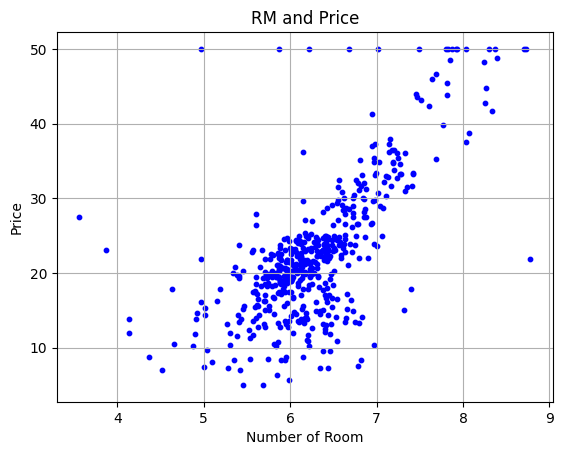

In [19]:
#산포도 출력(x와 yt)
plt.scatter(x, yt, s=10, c='b')
plt.xlabel('Number of Room')
plt.ylabel('Price')
plt.title('RM and Price')
plt.grid()
plt.show()

모델 정의

In [20]:
#변수 정의

#입력 차원 수 
n_input = x.shape[1]

#출력 차원 수
n_output = 1

print(f'입력 차원 수: {n_input}   출력 차원 수:{n_output}')

입력 차원 수: 1   출력 차원 수:1


In [21]:
#머신러닝 모델(예측 모델)의 클래스 정의
class Net(nn.Module):#nn.Module클래스 상속(Net--> nn.Module의 자식 클래스
    def __init__(self, n_input, n_output):
        super().__init__()

        #출력 층 정의
        self.l1 = nn.Linear(n_input, n_output)

        #초기값을 1로 설정(이유: 책과 결과값을 맞추기 위해)
        nn.init.constant_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    #예측 함수 정의(중요)
    def forward(self, x):
        x1 = self.l1(x)#선형 회귀
        return x1
    """
    모델용 클랫의 내부에서 반드시 forward함수를 정의해서,
    입력 텐서인 inputs를 받아 출력 텐서 outputs를
    반환하기 위해 처리를 기술하는, 하나의 규칙으로 자리매김한다
    """

In [22]:
#인스턴스 생성

net = Net(n_input, n_output)

output = net(inputs)

In [23]:
#모델 안의 파라미터를 확인
#named_parameters 함수 사용
#첫번째 요소: 변수 명    두 번째 요소: 변수 값
#predict.weight, pridict.bias 파라미터가 존재

for parameter in net.named_parameters():
    print(f'변수 명: {parameter[0]}')
    print(f'변수 값: {parameter[1].data}')

변수 명: l1.weight
변수 값: tensor([[1.]])
변수 명: l1.bias
변수 값: tensor([1.])


In [24]:
#파라미터 리스트를 가져오기 위해 parameters 함수를 사용
#최적화 함수의 인스턴스를 생성하는 과정에서 최적의 대상인 파라미터를 리스트로 넘겨줄 필요가 있어서 사용
for parameter in net.parameters():
    print(parameter)

Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [25]:
#머신러닝 구조에서 신경망 구조는 가장 중요하기 때문에 모델의 개요를 표시
print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [26]:
#모델 개요 표시
from torchinfo import summary
summary(net, (1,))#인수로 net변수와 입력변수의 사이즈를 지정해야함(이번에는 단일변수이므로 (1,)입력)

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [27]:
import torch.optim as optim

In [28]:
#손실함수와 최적화 함수 정의
criterion = nn.MSELoss()

lr = 0.01

optimizer = optim.SGD(net.parameters(), lr = lr)

In [29]:
#경사하강법
#입력값 x 정답 yt를 텐서로
inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float() #labels --> criterion함수(MSELoss의 인스턴스)로 예측 값과 함께 넘겨 손실 계산(이때, 인수는 N차원 벡터X, (N, 1)차원 행렬 형식을 만족해야함)

print(inputs.shape)
print(labels.shape)

torch.Size([506, 1])
torch.Size([506])


In [30]:
#손실 계산을 위해 labels를 (N, 1) 차원의 행렬로 변환
labels1 = labels.view(-1, 1)
print(labels1.shape)

torch.Size([506, 1])


In [31]:
#예측계산
output = net(inputs)

In [32]:
#손실계산
loss = criterion(output, labels1)

#손실 값 가져오기
print(f'{loss.item():.5f}')

308.44986


In [33]:
from torchviz import make_dot

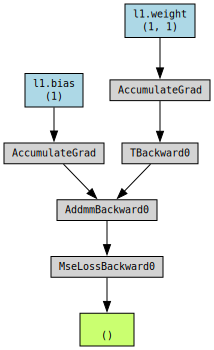

In [34]:
#계산 그래프 시각화
g = make_dot(loss, params=dict(net.named_parameters()))#named_parameters()는 추출하는 것이어서 dict로 딕셔너리 형태로 만들어줘야하는 것으로 예상됨
display(g)

In [35]:
#예측 계산
output = net(inputs)

#손실계산
loss = criterion(output, labels1)

#경사 계산
loss.backward()

#경사 계산 결과를 취득 가능하도록 함
print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[-199.6421]])
tensor([-30.4963])


In [36]:
#파라미터 수정
optimizer.step()

#파라미터 확인
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[2.9964]], requires_grad=True)
Parameter containing:
tensor([1.3050], requires_grad=True)


In [37]:
#경사값 초기화
optimizer.zero_grad()

#파라미터 확인
print(net.l1.weight.grad)
print(net.l1.bias.grad)

None
None


반복 계산

In [39]:
#초기화 처리
lr = 0.01

net = Net(n_input, n_output)

output = net(inputs)

loss = criterion(output, labels1)

optimizer = optim.SGD(net.parameters(), lr=lr)

num_epoch = 50000

history = np.zeros((0, 2))

In [40]:
#반복 계산 메인 루프
for epoch in range(num_epoch):
    #경사값 초기화
    optimizer.zero_grad()

    #예측 계산
    output = net(inputs)

    #손실계산
    loss = criterion(output, labels1) / 2.0 # 2.0으로 나눈건 책과 결과를 맞추기 위함

    #경사계산
    loss.backward()

    #파라미터 수정
    optimizer.step()

    #100회마다 경과 기록
    if (epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch: {epoch}  Loss: {loss.item():.5f}')

Epoch: 0  Loss: 154.22493
Epoch: 100  Loss: 29.61752
Epoch: 200  Loss: 29.43177
Epoch: 300  Loss: 29.25043
Epoch: 400  Loss: 29.07340
Epoch: 500  Loss: 28.90058
Epoch: 600  Loss: 28.73186
Epoch: 700  Loss: 28.56716
Epoch: 800  Loss: 28.40636
Epoch: 900  Loss: 28.24939
Epoch: 1000  Loss: 28.09615
Epoch: 1100  Loss: 27.94654
Epoch: 1200  Loss: 27.80050
Epoch: 1300  Loss: 27.65792
Epoch: 1400  Loss: 27.51873
Epoch: 1500  Loss: 27.38285
Epoch: 1600  Loss: 27.25020
Epoch: 1700  Loss: 27.12070
Epoch: 1800  Loss: 26.99428
Epoch: 1900  Loss: 26.87086
Epoch: 2000  Loss: 26.75037
Epoch: 2100  Loss: 26.63275
Epoch: 2200  Loss: 26.51792
Epoch: 2300  Loss: 26.40582
Epoch: 2400  Loss: 26.29639
Epoch: 2500  Loss: 26.18955
Epoch: 2600  Loss: 26.08525
Epoch: 2700  Loss: 25.98343
Epoch: 2800  Loss: 25.88404
Epoch: 2900  Loss: 25.78700
Epoch: 3000  Loss: 25.69227
Epoch: 3100  Loss: 25.59979
Epoch: 3200  Loss: 25.50950
Epoch: 3300  Loss: 25.42137
Epoch: 3400  Loss: 25.33532
Epoch: 3500  Loss: 25.25132
Epo

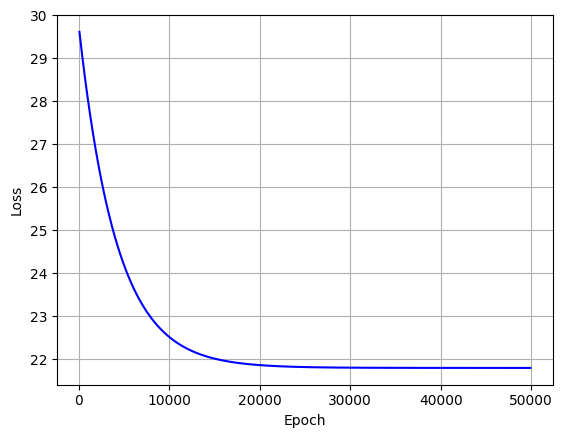

In [41]:
#학습곡선 출력
plt.plot(history[1:,0], history[1:, 1], 'b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

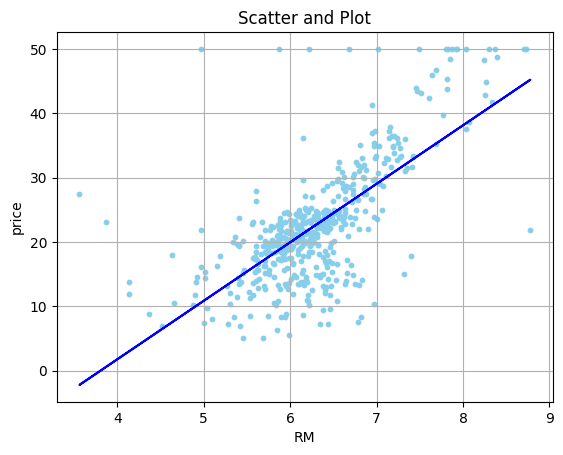

In [45]:
plt.scatter(x, yt, c='skyblue', s=10)
plt.plot(x, output.data, c='b')
plt.xlabel('RM')
plt.ylabel('price')
plt.title('Scatter and Plot')
plt.grid()
plt.show()

중회귀 모델로 확장(입력 변수 추가(LSTAT항목))

In [48]:
# 열 LSTAT(저소득자 비율) 추가
x_add = x_org[:, feature_names=='LSTAT']
x2 = np.hstack((x, x_add))

#print(x2)
print(x2.shape)

#입력데이터 x 표시
print(x2[:5, :])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [49]:
#입력 차원수 = 2
n_input = x2.shape[1]
print(n_input)

#모델 인스턴스 생성
net = Net(n_input, n_output)

2


In [54]:
#파라미터 확인
for param in net.named_parameters():
    print(f'변수 명: {param[0]}')#weight가 2가됨
    #print(f'{param[1]}')
    print(f'변수 값: {param[1].data}')

변수 명: l1.weight
변수 값: tensor([[1., 1.]])
변수 명: l1.bias
변수 값: tensor([1.])


In [56]:
print(net)
summary(net, (2,))

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
)


Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [57]:
inputs = torch.tensor(x2).float()

In [58]:
#초기화 처리
lr = 0.001

net = Net(n_input, n_output)

output = net(inputs)

loss = criterion(output, labels1)

optimizer = optim.SGD(net.parameters(), lr=lr)

num_epoch = 2000

history = np.zeros((0, 2))

In [59]:
#반복 계산 메인 루프
for epoch in range(num_epoch):
    #경사값 초기화
    optimizer.zero_grad()

    #예측 계산
    output = net(inputs)

    #손실계산
    loss = criterion(output, labels1) / 2.0 # 2.0으로 나눈건 책과 결과를 맞추기 위함

    #경사계산
    loss.backward()

    #파라미터 수정
    optimizer.step()

    #100회마다 경과 기록
    if (epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch: {epoch}  Loss: {loss.item():.5f}')

Epoch: 0  Loss: 112.06398
Epoch: 100  Loss: 25.35892
Epoch: 200  Loss: 16.39106
Epoch: 300  Loss: 15.40302
Epoch: 400  Loss: 15.29414
Epoch: 500  Loss: 15.28211
Epoch: 600  Loss: 15.28076
Epoch: 700  Loss: 15.28059
Epoch: 800  Loss: 15.28054
Epoch: 900  Loss: 15.28051
Epoch: 1000  Loss: 15.28048
Epoch: 1100  Loss: 15.28046
Epoch: 1200  Loss: 15.28043
Epoch: 1300  Loss: 15.28040
Epoch: 1400  Loss: 15.28037
Epoch: 1500  Loss: 15.28034
Epoch: 1600  Loss: 15.28031
Epoch: 1700  Loss: 15.28028
Epoch: 1800  Loss: 15.28026
Epoch: 1900  Loss: 15.28023


In [60]:
print(f'초기 손실 값:{history[0, 1]:.5f}')
print(f'최종 손실 값:{history[-1,1]:.5f}')

초기 손실 값:112.06398
최종 손실 값:15.28023


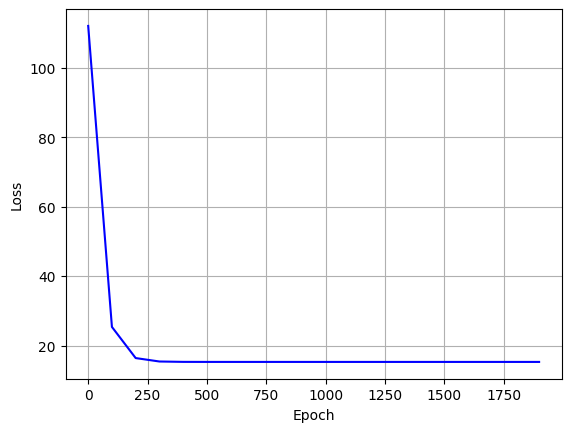

In [61]:
plt.plot(history[:, 0], history[:, 1], 'b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()